In [1]:
import matplotlib.pyplot as plt
import pygad
import numpy

"""
给定以下函数：
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    式中 (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) 和 y=44
6个权重最佳值是多少 (w1 to w6)? 我们将使用遗传算法
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance,solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 5000 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

'''
num_generations:种群代数。
num_parents_mating:要选择作为父项的解决方案的数量。
fitness_func:接受一个评估函数，该函数必须接受2个参数（单个解，以及其在总体中的索引）并返回解的评估值。查看Preparing the “fitness_func” Parameter 部分以获取有关创建此类函数的信息。
sol_per_pop:种群中的解决方案（如染色体）的数量。当参数initial_population存在时该参数失效。
num_genes:解决方案中的基因数。当参数initial_population存在时该参数失效。
on_generation=None:接受在每次生成后调用的函数。此函数必须接受表示遗传算法实例的单个参数。如果函数返回字符串stop，则run（）方法将停止，而不会完成其他代。
'''


ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

D:\Anacoda\anaconda\envs\NLP\lib\site-packages\pygad\pygad.py:623: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = 0.41060804525357214
Change     = 0.41060804525357214
Generation = 2
Fitness    = 2.1766356262049276
Change     = 1.7660275809513555
Generation = 3
Fitness    = 2.1766356262049276
Change     = 0.0
Generation = 4
Fitness    = 5.303986527373307
Change     = 3.1273509011683793
Generation = 5
Fitness    = 5.303986527373307
Change     = 0.0
Generation = 6
Fitness    = 12.933760993639682
Change     = 7.629774466266375
Generation = 7
Fitness    = 12.933760993639682
Change     = 0.0
Generation = 8
Fitness    = 12.933760993639682
Change     = 0.0
Generation = 9
Fitness    = 12.933760993639682
Change     = 0.0
Generation = 10
Fitness    = 12.933760993639682
Change     = 0.0
Generation = 11
Fitness    = 12.933760993639682
Change     = 0.0
Generation = 12
Fitness    = 12.933760993639682
Change     = 0.0
Generation = 13
Fitness    = 12.933760993639682
Change     = 0.0
Generation = 14
Fitness    = 35.501663519283305
Change     = 22.567902525643625
Generation = 15
Fitness  

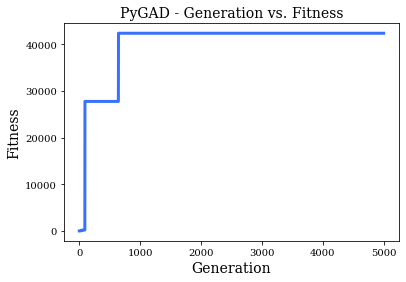

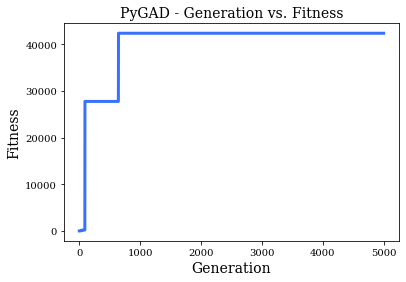

In [2]:
plt.rcParams['font.family']='serif'
ga_instance.plot_fitness()

In [3]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [-1.71207202 -1.90791203  1.69904662  4.79382478 -0.19573918 -3.18373799]
Fitness value of the best solution = 42365.11823177185
Index of the best solution : 0


In [4]:
prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Predicted output based on the best solution : 44.00002260432454


Best fitness value reached after 643 generations.


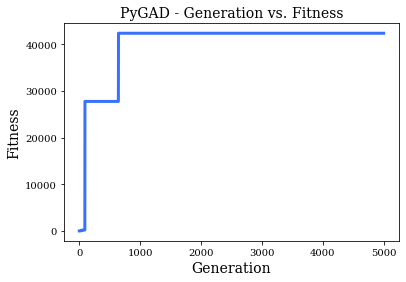

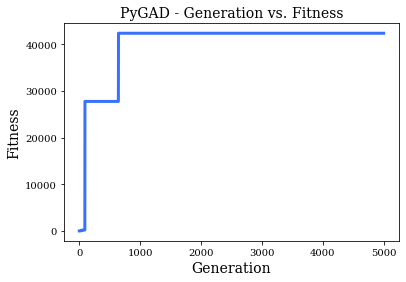

In [5]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

In [6]:
import pygad
import numpy as np
import pandas as pd

df  = pd.read_excel("data.xlsx")
Q6  = np.array(df["Q6"])
Q7  = np.array(df["Q7"])
Q8  = np.array(df["Q8"])
Q9  = np.array(df["Q9"])

df.head(5)

,Gender,Age,Educational Level,Major,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,male,L.26,master,arts,1,1,2,1,1,2,1,2
1,male,L.26,undergraduate,education,1,2,1,2,2,1,1,2
2,male,K.25,doctor,agriculture and forestry,2,2,2,2,2,2,1,2
3,female,L.26,master,medicine and nursing,1,1,1,2,1,1,2,2
4,male,D.18,undergraduate,arts,1,2,2,1,1,2,2,1


In [7]:

def LL(mu):
     def VG(mu, p, a, b, alpha=0.61):
        if p == 1 or b == 0:
            return (mu*a - np.exp(- mu * a)+1 )* p ** alpha / ( (p ** alpha) + (1-p) ** alpha) ** (1 / alpha)
        else:
            return (
               (mu*a- np.exp(- mu * a)+1 ) * p ** alpha / ( (p ** alpha) + (1-p) ** alpha) ** (1 / alpha) +
               (mu*b- np.exp(- mu * b)+1 ) * p ** alpha / ( (p ** alpha) + (1-p) ** alpha) ** (1 / alpha)
             )

     def cal_LL_by_Q(mu, Q, p1, a, b, p2, c, d):
         VG1 = VG(mu, p1, a, b)
         VG2 = VG(mu, p2, c, d)
         h1 = (Q == 1).astype(float)
         h2 = (Q == 2).astype(float)
         _LL = (
             h1 * np.log(1 / (1 + np.exp(VG2 - VG1))) +
         h2 * np.log(1 / (1 + np.exp(VG1 - VG2)))
         )
         return _LL.sum()
     return (
        cal_LL_by_Q(mu, Q6,  0.5, 2000, 0,    1, 1000, 0) +
        cal_LL_by_Q(mu, Q7,  0.8,   45, 0,    1,   30, 0) +
        cal_LL_by_Q(mu, Q8,  0.2,  130, 0, 0.25,  100, 0) +
        cal_LL_by_Q(mu, Q9, 0.01, 6000, 0, 0.02, 3000, 0)
    )
def fitness_func(ga_instance,_mu, _idx):
    l = LL(np.exp(_mu))              # make mu \in (0, +\inf)
    if l != l:                       # nan
        l = -10000000
    return l

In [11]:

fitness_function = fitness_func

num_generations = 10000
num_parents_mating = 4

sol_per_pop = 50
num_genes = 1

init_range_low = -1
init_range_high = 1

parent_selection_type = "rws"
keep_parents = 1

crossover_type = "single_point"
crossover_probability = 0.8
mutation_probability = 0.01

mutation_type = "random"
mutation_percent_genes = 20


'''
num_generations:种群代数。
num_parents_mating:要选择作为父项的解决方案的数量。
fitness_func:接受一个评估函数，该函数必须接受2个参数（单个解，以及其在总体中的索引）并返回解的评估值。查看Preparing the “fitness_func” Parameter 部分以获取有关创建此类函数的信息。
sol_per_pop:种群中的解决方案（如染色体）的数量。当参数initial_population存在时该参数失效。
num_genes:解决方案中的基因数。当参数initial_population存在时该参数失效。
on_generation=None:接受在每次生成后调用的函数。此函数必须接受表示遗传算法实例的单个参数。如果函数返回字符串stop，则run（）方法将停止，而不会完成其他代。

init_range_low=-4:选择初始群体中基因值的随机范围的较小值。init_range_low默认为-4。当’initial_population`参数存在时该参数无效。
init_range_high=4:选择初始群体中基因值的随机范围的较大值。init_range_high默认为4。当’initial_population`参数存在时该参数无效。

parent_selection_type="sss":夫选择类型。支持类型有sss(steady-state selection稳态选择),rws( roulette wheel selection轮盘赌轮选择),sus(stochastic universal selection随机普遍选择),rank(rank selection排名选择),random(random selection随机选择),以及tournament(tournament selection锦标赛选择)。

keep_parents=-1:当前种群中保持的父母数量。默认值-1表示将所有父母保持在下一种群中。0意味着没有父母在下一种群中。一个大于0的值表示将指定数量的父母保持在下一代种群中。注意，keep_parents的值不能小于-1或大于种群中的解决方案数sol_per_pop。

crossover_type="single_point":交叉操作类型。支持类型有single_point(单点交叉),two_point(两点交叉),uniform(均匀交叉),以及scattered(分散交叉)。其默认值为single_point。如果crossover_type=None，则绕过交叉步骤，这意味着不应用交叉，因此不会在下一代中创建后代。下一代将使用当前种群中的解决方案。

crossover_probability=None:选择父项以应用交叉操作的概率。它的值必须介于 0.0 和 1.0 之间（包括 0.0 和 1.0）。对于每个父项，会生成一个介于 0.0 和 1.0 之间的随机值。如果此随机值小于或等于分配给crossover_probability 参数的值，则选择父项。

mutation_type="random":变异操作的类型。支持类型有random(随机变异),swap(交换变异),inversion(反演变异),scramble(争夺变异)以及adaptive(适应性变异)。其默认值为random。如果mutation_type=None,即绕过突变步骤，这意味着不应用突变，因此不会对使用交叉操作创建的后代应用任何更改，其后代将在下一代中不变地使用。

mutation_probability=None:选择基因进行变异操作的概率。它的值必须介于 0.0 和 1.0 之间（包括 0.0 和 1.0）。对于解决方案中的每个基因，都会生成一个介于 0.0 和 1.0 之间的随机值。如果此随机值小于或等于分配给mutation_probability 参数的值，则选择该基因。如果这个参数存在，那么就不需要mutation_percent_genes和mutation_num_genes这2个参数。

mutation_percent_genes="default":基因突变的百分比。其默认字符串"default"随后将其转化为整数10，意味着10%的基因将发生突变。它的值必须大于0小于等于100。在这个百分比中，将推导出要突变的基因数量，该数量分配给mutation_num_genes参数。如果存在mutation_probability或mutation_num_genes参数，则mutation_percent_genes参数将无效。当mutation_type参数为None时，该参数无效。
'''




ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    init_range_low=init_range_low,
    init_range_high=init_range_high,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    crossover_probability=crossover_probability,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes
)

ga_instance.run()

D:\Anacoda\anaconda\envs\NLP\lib\site-packages\pygad\pygad.py:641: UserWarning: The percentage of genes to mutate (mutation_percent_genes=20) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_5688/2259619676.py:17: RuntimeWarning: overflow encountered in exp
  h1 * np.log(1 / (1 + np.exp(VG2 - VG1))) +
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_5688/2259619676.py:17: RuntimeWarning: divide by zero encountered in log
  h1 * np.log(1 / 

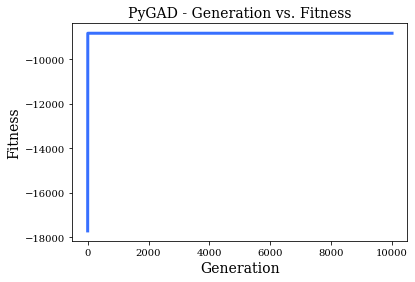

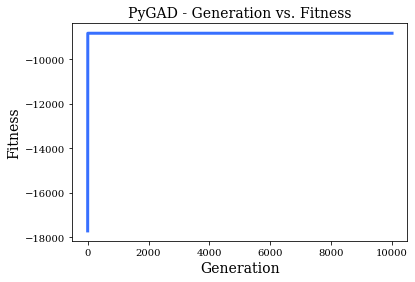

In [12]:
ga_instance.plot_fitness()

In [14]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best mu : {mu}".format(mu=np.exp(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


Best mu : [0.18124531]
Fitness value of the best solution = -8834.125748855367


C:\Users\Bingbing\AppData\Local\Temp/ipykernel_5688/2259619676.py:17: RuntimeWarning: overflow encountered in exp
  h1 * np.log(1 / (1 + np.exp(VG2 - VG1))) +
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_5688/2259619676.py:17: RuntimeWarning: divide by zero encountered in log
  h1 * np.log(1 / (1 + np.exp(VG2 - VG1))) +
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_5688/2259619676.py:17: RuntimeWarning: invalid value encountered in multiply
  h1 * np.log(1 / (1 + np.exp(VG2 - VG1))) +
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_5688/2259619676.py:18: RuntimeWarning: overflow encountered in exp
  h2 * np.log(1 / (1 + np.exp(VG1 - VG2)))
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_5688/2259619676.py:18: RuntimeWarning: divide by zero encountered in log
  h2 * np.log(1 / (1 + np.exp(VG1 - VG2)))
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_5688/2259619676.py:18: RuntimeWarning: invalid value encountered in multiply
  h2 * np.log(1 / (1 + np.exp(VG1 - VG2)))
